In [27]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the dataset
df = pd.read_csv('TaxiData.csv')

- Analysis on overall Dataset.
- Provide info about columns and its Datatypes.
- State missing values and other organic analysis.
```py
# Check data shape, summary, ...

# Identify missing values
# Plot missing values (customize as needed)
# missing_values.plot(...)

# Any change of data type conversion required?
```

In [30]:
# Display the first few rows of the dataset
df.head()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0


In [31]:
df.dtypes

pickup_community_area     float64
fare                      float64
trip_start_month            int64
trip_start_hour             int64
trip_start_day              int64
trip_start_timestamp        int64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
payment_type               object
company                    object
trip_seconds              float64
dropoff_community_area    float64
tips                      float64
dtype: object

In [32]:
# Categorize columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
mixed_columns = [col for col in df.columns if col not in categorical_columns + numerical_columns]

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)
print("Mixed columns:", mixed_columns)

Categorical columns: ['payment_type', 'company']
Numerical columns: ['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 'trip_start_timestamp', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract', 'trip_seconds', 'dropoff_community_area', 'tips']
Mixed columns: []


In [33]:
# Convert date columns to datetime
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])
# Convert categorical columns to a category type
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [34]:
df.dtypes

pickup_community_area      float64
fare                       float64
trip_start_month             int64
trip_start_hour              int64
trip_start_day               int64
trip_start_timestamp         int64
pickup_latitude            float64
pickup_longitude           float64
dropoff_latitude           float64
dropoff_longitude          float64
trip_miles                 float64
pickup_census_tract        float64
dropoff_census_tract       float64
payment_type              category
company                   category
trip_seconds               float64
dropoff_community_area     float64
tips                       float64
dtype: object

In [35]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

pickup_community_area         2
fare                          0
trip_start_month              0
trip_start_hour               0
trip_start_day                0
trip_start_timestamp          0
pickup_latitude               2
pickup_longitude              2
dropoff_latitude            482
dropoff_longitude           482
trip_miles                    0
pickup_census_tract       15001
dropoff_census_tract       4241
payment_type                  0
company                    5140
trip_seconds                  6
dropoff_community_area      506
tips                          0
dtype: int64

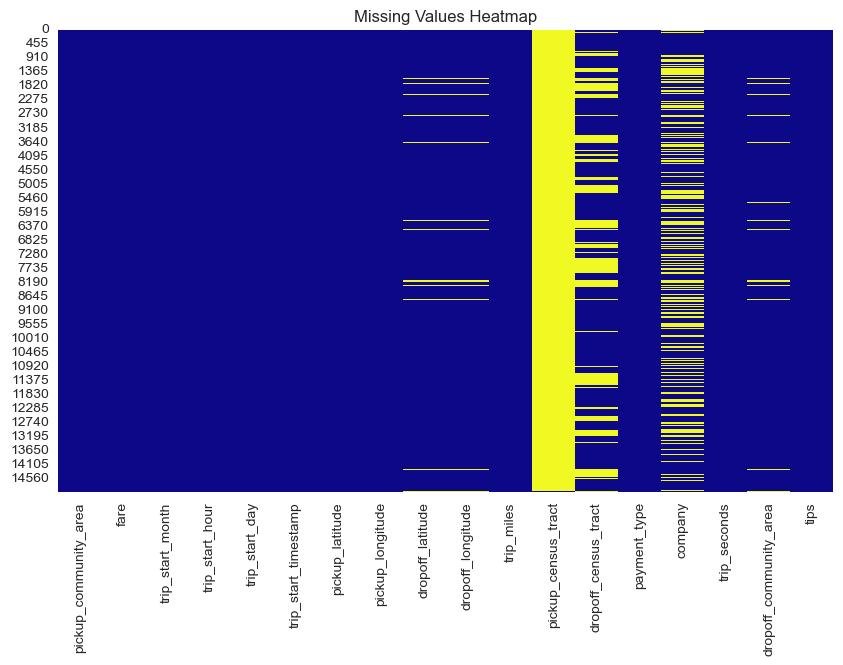

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='plasma')
plt.title('Missing Values Heatmap')
plt.show()

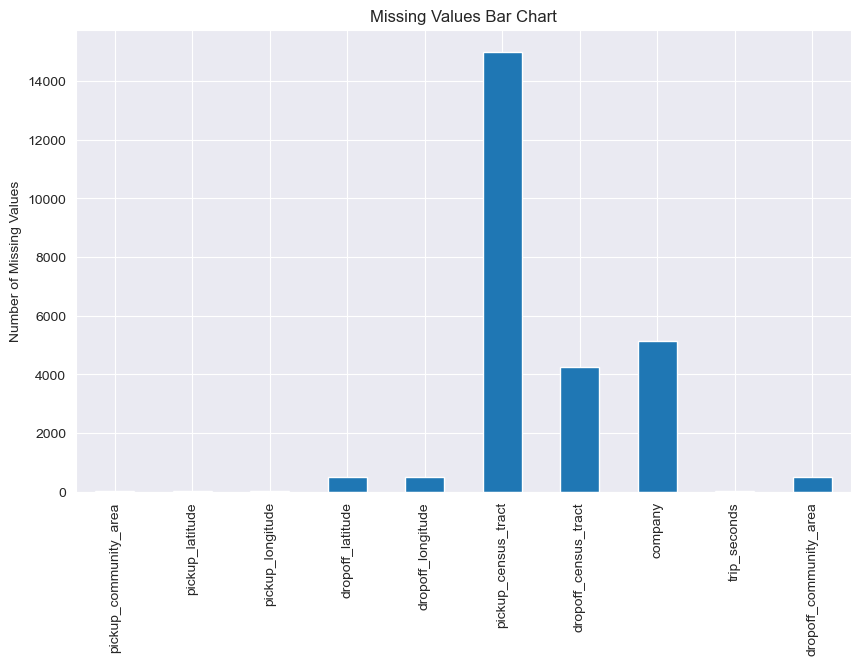

In [37]:
# Alternatively, visualize missing values using a bar chart
missing_values[missing_values > 0].plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values Bar Chart')
plt.ylabel('Number of Missing Values')
plt.show()

In [38]:
# Mean imputation for numerical columns
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
        print(f"Filled missing values in {col} with mean value.")

# Mode imputation for categorical columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"Filled missing values in {col} with mode value.")

# Verify that there are no more missing values
df.isnull().sum()

Filled missing values in pickup_community_area with mean value.
Filled missing values in pickup_latitude with mean value.
Filled missing values in pickup_longitude with mean value.
Filled missing values in dropoff_latitude with mean value.
Filled missing values in dropoff_longitude with mean value.
Filled missing values in pickup_census_tract with mean value.
Filled missing values in dropoff_census_tract with mean value.
Filled missing values in trip_seconds with mean value.
Filled missing values in dropoff_community_area with mean value.
Filled missing values in company with mode value.


pickup_community_area     0
fare                      0
trip_start_month          0
trip_start_hour           0
trip_start_day            0
trip_start_timestamp      0
pickup_latitude           0
pickup_longitude          0
dropoff_latitude          0
dropoff_longitude         0
trip_miles                0
pickup_census_tract       0
dropoff_census_tract      0
payment_type              0
company                   0
trip_seconds              0
dropoff_community_area    0
tips                      0
dtype: int64